In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import datetime
import warnings
import ipywidgets as widgets
from ipywidgets import interact

# -------------------------------------------------------------------------
warnings.filterwarnings("ignore")
%matplotlib inline
%load_ext nb_black
plt.rcParams["figure.figsize"] = [15, 5]
plt.style.use("fivethirtyeight")

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

# 1. Correlação entre Séries Temporais Aleatórias

Se você está aqui aposto que já está cansado de ouvir que correlação não é causalidade, não é meninx? :)

Aqui trataremos de um tema menos badalado contudo. Como tratar de correlações calculadas para séries temporais? 

Direto ao ponto, como pretendo ser nessa série **Data Pills**. 

Abaixo geraremos duas séries com 500 números aleatórios entre 0 e 1000. 

Text(0.5, 1.0, 'Duas Séries Aleatórias com Valores entre 0 e 1000 \n')

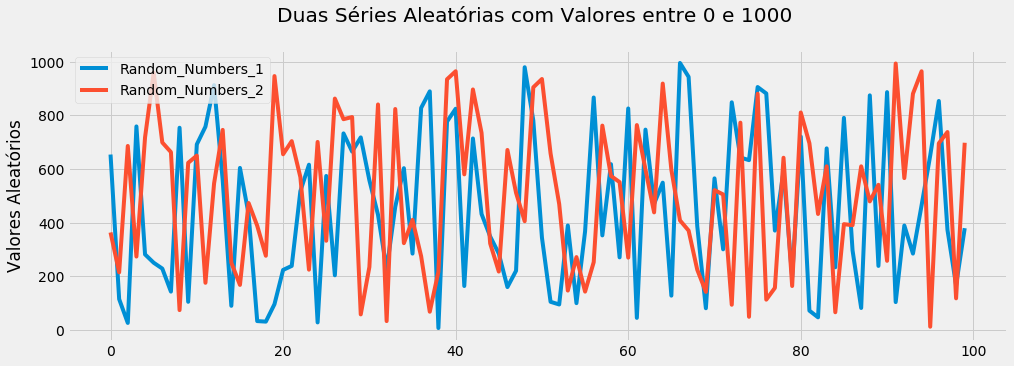

<IPython.core.display.Javascript object>

In [7]:
random.seed(42)  # Reproducilidade sempre!
# Séries de números aleatórios entre 0 e 100
random_numbers_1 = [random.randint(0, 1000) for _ in range(100)]
random_numbers_2 = [random.randint(0, 1000) for _ in range(100)]

# Dicionário contendo as séries aleatórias
dict_random = {
    "Random_Numbers_1": random_numbers_1,
    "Random_Numbers_2": random_numbers_2,
}

# Pandas DataFrame contendo as séries aleatórias
random_numbers_df = pd.DataFrame(dict_random)

# Plot
ax = random_numbers_df.plot()
ax.set_ylabel("Valores Aleatórios")
ax.set_title("Duas Séries Aleatórias com Valores entre 0 e 1000 \n")

Nossa intuição diz que duas séries aleatórias tem correlação baixa, certo? O gráfico acima, apesar de bagunçado mostra que a intuição provavelmente está correta, dado que os picos e vales não são coincidentes. No fim das contas o cálculo de correlação serve para medir a coocorrência de valores abaixo ou acima da média das séries. Quando em média as duas séries têm valores acima da média juntos na maior parte do tempo, o coeficiente de correlação é positivo. Valores abaixo da média aparecendo juntos na maior parte do tempo leva o coeficiente a ser negativo. 

In [10]:
random_correlation = random_numbers_df["Random_Numbers_1"].corr(
    random_numbers_df["Random_Numbers_2"]
)
f"O coeficiente de correlação entre as duas séries aleatórias geradas é {random_correlation:0.2f}"

'O coeficiente de correlação entre as duas séries aleatórias geradas é -0.10'

<IPython.core.display.Javascript object>

Bingo! A correlação realmente é baixa e negativa. 

# 2. Correlação entre Séries Temporais Aleatórias que Apresentam Tendência

Agora exploraremos o efeito de uma tendência nas séries. Por tendência entenda o aumento ou diminuição da média da série ao longo do tempo. Veremos que temos que tomar extremo cuidado em situações em que isso ocorre. 

In [11]:
def trend_series(slope):
    """ Esta função retorna o gráfico das duas séries temporais geradas neste
        notebook bem como o cálculo da correlação entre elas no título."""

    slope = slope
    trend = [slope * x for x in range(100)]
    random_numbers_df["Slope_1"] = trend + random_numbers_df["Random_Numbers_1"]
    random_numbers_df["Slope_2"] = trend + random_numbers_df["Random_Numbers_2"]
    correlation = random_numbers_df["Slope_1"].corr(random_numbers_df["Slope_2"])
    ax = random_numbers_df[["Slope_1", "Slope_2"]].plot()
    ax.set_title(
        f"A correlação das séries para uma inclinação de {slope} é : {correlation:0.2f}"
    )
    return ax

<IPython.core.display.Javascript object>

Que tal explorar com os possíveis valores de inclinações no gráfico interativo abaixo? Podemos escolher valores de inclinação entre -100 e +300 na barra deslizante. O gráfico das séries bem como a correlação são atualizados automaticamente. 

In [19]:
interact(trend_series, slope=100)

interactive(children=(IntSlider(value=100, description='slope', max=300, min=-100), Output()), _dom_classes=('…

<function __main__.trend_series(slope)>

<IPython.core.display.Javascript object>

Perceberam o perigo? 

Explico. 

Adicionamos uma tendência constante às duas séries aleatórias. Qual a quantidade de informação ganhamos adicionando a tendência? Zero, nenhuma. Apesar disso o valor da correlação calculada saltou para +1.00 (correlação quase perfeita) quando adcionamos um valor multiplicativo (tendência) de 300.
O que de fato aconteceu aqui? O cálculo de correlação é válido para **séries estacionárias**, aquelas onde o valor da média e da variância são constantes (aproximadamente, ok?) com o tempo. Quando adicionamos uma tendência não temos mais duas séries estacionárias. Experimente com valores grandes (positivos e negativos) e veja o gráfico. A correlação calculada (alta) te dirá o seguinte: ambas as séries crescem ou descrescem juntas com o tempo. Mas nossa intenção era calcular o quanto as séries são semelhantes, não? 


# 3. Séries Não-Estacionárias -----> Séries Estacionárias

Como obter uma série estacionária? A essa altura já está claro que basta descontar a tendência de todos os valores, correto? Mas como fazer isso na prática? 

 -  Calcular uma regressão e descontar dos valores da série. 
 
 - Substituir cada ponto da série pela diferença entre seu valor e o do ponto que ocorreu anteriormente (valor = valor_t− valor_t−1)

Aqui usaremos o segundo método proposto, implementado pelo método diff() do pacote Pandas. 

Gere duas séries com tendências temporais elevadas na barra deslizante e veja o valor da correlação calculada. Mantenha este valor fixo e clique no botão *torna_estacionarias* e veja o valor da correlação. 

In [46]:
def trend_series_stationarity(slope, torna_estacionarias=False):
    """ Esta função retorna o gráfico das duas séries temporais geradas neste
        notebook bem como o cálculo da correlação entre elas no título."""

    slope = slope
    trend = [slope * x for x in range(100)]
    if torna_estacionarias:
        random_numbers_df["Slope_1"] = (
            (trend + random_numbers_df["Random_Numbers_1"]).diff().diff()
        )
        random_numbers_df["Slope_2"] = (
            (trend + random_numbers_df["Random_Numbers_2"]).diff().diff()
        )
    else:
        random_numbers_df["Slope_1"] = trend + random_numbers_df["Random_Numbers_1"]
        random_numbers_df["Slope_2"] = trend + random_numbers_df["Random_Numbers_2"]

    correlation = random_numbers_df["Slope_1"].corr(random_numbers_df["Slope_2"])
    ax = random_numbers_df[["Slope_1", "Slope_2"]].plot()
    ax.set_title(
        f"A correlação das séries para uma inclinação de {slope} é : {correlation:0.2f}"
    )
    return ax

<IPython.core.display.Javascript object>

In [45]:
interact(trend_series_stationarity, slope=100, stationarity=False)

interactive(children=(IntSlider(value=100, description='slope', max=300, min=-100), Checkbox(value=False, desc…

<function __main__.trend_series_stationarity(slope, torna_estacionaria=False)>

<IPython.core.display.Javascript object>

# 4. Conclusão

A intenção deste texto foi deixar um recado forte: sempre visualize séries temporais antes de calcular quaisquer correlações e tomar decisões baseadas nelas. Torne as séries estacionárias antes e use com segurança toda a teoria de séries temporais. Não viole os requisitos de média e variância serem independentes do tempo!